# Report Side Benchmarks
- Annotator vs Model Accuracy
- Annotator quality scores
- Annotator Agreement Consensus vs. Label Accuracy

TODO: Add visualization code?

In [1]:
import numpy as np
from IPython.display import display # pretty display
from utils.eval import (get_annotator_mask, 
                        get_labels_error_mask,
                        get_model_vs_consensus_accuracy,
                        plt_annotator_accuracy, 
                        plt_labels_multiannotator)
from cleanlab.multiannotator import get_consensus_label

In [2]:
!wget -nc "https://cleanlab-public.s3.amazonaws.com/Multiannotator/cifar-10h/benchmark_data.tar.gz" 
!tar -xf benchmark_data.tar.gz benchmark_data/
!mkdir benchmark_results

File ‘benchmark_data.tar.gz’ already there; not retrieving.

tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.FinderInfo'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.FinderInfo'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.FinderInfo'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.FinderInfo'
mkdir: cannot create directory ‘benchmark_results’: File exists


In [3]:
def load_data(dataset, model):
    multiannotator_labels = np.load(f"benchmark_data/{dataset}/{model}/annotator_labels.npy")
    true_labels = np.load(f"benchmark_data/{dataset}/{model}/true_labels.npy")
    pred_probs = np.load(f"benchmark_data/{dataset}/{model}/pred_probs.npy")
    
    return multiannotator_labels, true_labels, pred_probs

In [4]:
model_names = ["resnet18", "swin", "truelabels"]
datasets = ["worst_annotators", "uniform_1_5", "complete"]

--------------------------------------------------------------------------------
- DATASET worst_annotators
- MODEL resnet18
--- [1] Annotator vs Model accuracy ---


,Type,Percent
0,Annotator accuracy,0.9346
1,Model accuracy,0.8786
2,Shared labels between model and consensus,0.8455


- MODEL swin
--- [1] Annotator vs Model accuracy ---


,Type,Percent
0,Annotator accuracy,0.9346
1,Model accuracy,0.9404
2,Shared labels between model and consensus,0.8967


- MODEL truelabels
--- [1] Annotator vs Model accuracy ---


,Type,Percent
0,Annotator accuracy,0.9346
1,Model accuracy,0.9484
2,Shared labels between model and consensus,0.8993


- MODEL AGNOSTIC

--- [2] Distribution of individual annotator accuracy vs ground truth ---


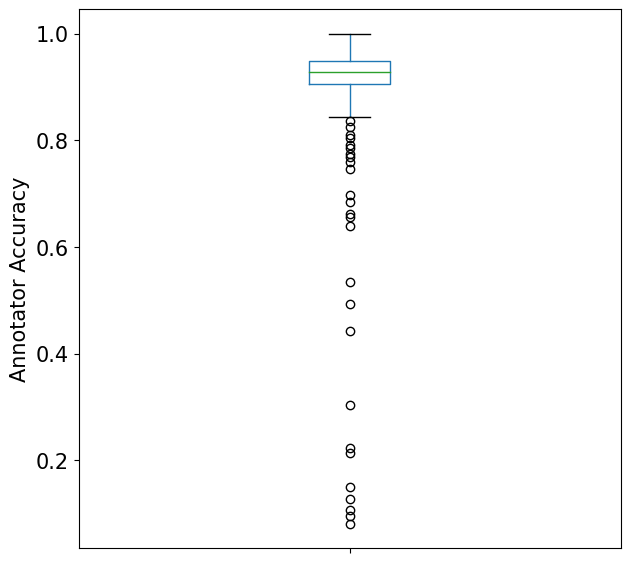

,score
count,511.000000
mean,0.909496
std,0.109480
min,0.081081
25%,0.905955
50%,0.928571
75%,0.948276
max,1.000000


--- [3] Annotator Agreement with Consensus vs. Label Accuracy ---


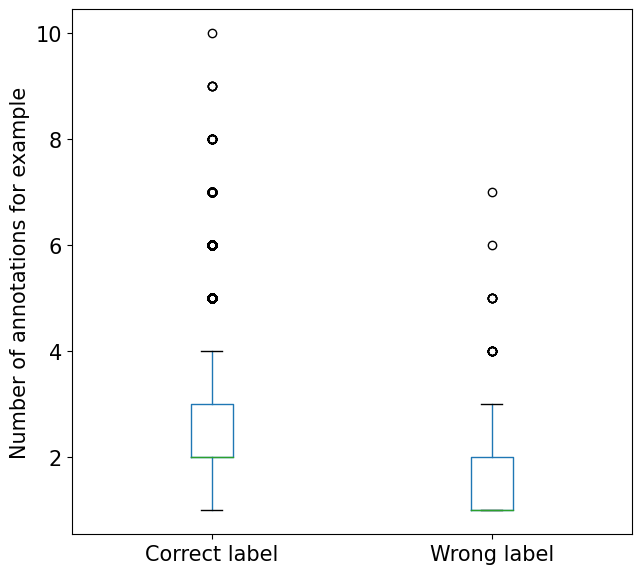

--------------------------------------------------------------------------------
- DATASET uniform_1_5
- MODEL resnet18
--- [1] Annotator vs Model accuracy ---


,Type,Percent
0,Annotator accuracy,0.9679
1,Model accuracy,0.8862
2,Shared labels between model and consensus,0.8700


- MODEL swin
--- [1] Annotator vs Model accuracy ---


,Type,Percent
0,Annotator accuracy,0.9679
1,Model accuracy,0.9445
2,Shared labels between model and consensus,0.9256


- MODEL truelabels
--- [1] Annotator vs Model accuracy ---


,Type,Percent
0,Annotator accuracy,0.9679
1,Model accuracy,0.9484
2,Shared labels between model and consensus,0.9278


- MODEL AGNOSTIC

--- [2] Distribution of individual annotator accuracy vs ground truth ---


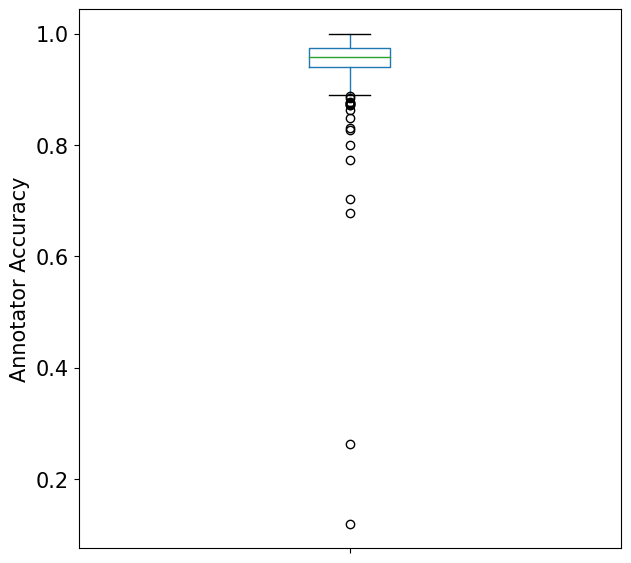

,score
count,421.000000
mean,0.947893
std,0.063853
min,0.119403
25%,0.939394
50%,0.957143
75%,0.973333
max,1.000000


--- [3] Annotator Agreement with Consensus vs. Label Accuracy ---


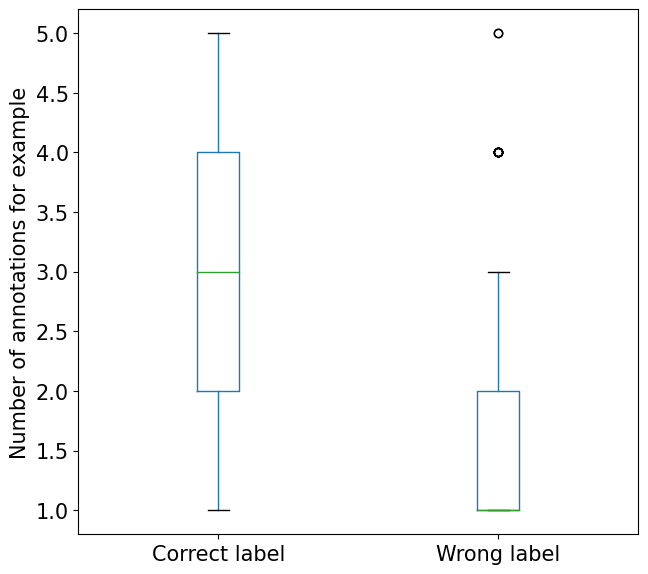

--------------------------------------------------------------------------------
- DATASET complete
- MODEL resnet18
--- [1] Annotator vs Model accuracy ---


,Type,Percent
0,Annotator accuracy,0.9922
1,Model accuracy,0.8850
2,Shared labels between model and consensus,0.8835


- MODEL swin
--- [1] Annotator vs Model accuracy ---


,Type,Percent
0,Annotator accuracy,0.9922
1,Model accuracy,0.9475
2,Shared labels between model and consensus,0.9452


- MODEL truelabels
--- [1] Annotator vs Model accuracy ---


,Type,Percent
0,Annotator accuracy,0.9922
1,Model accuracy,0.9484
2,Shared labels between model and consensus,0.9472


- MODEL AGNOSTIC

--- [2] Distribution of individual annotator accuracy vs ground truth ---


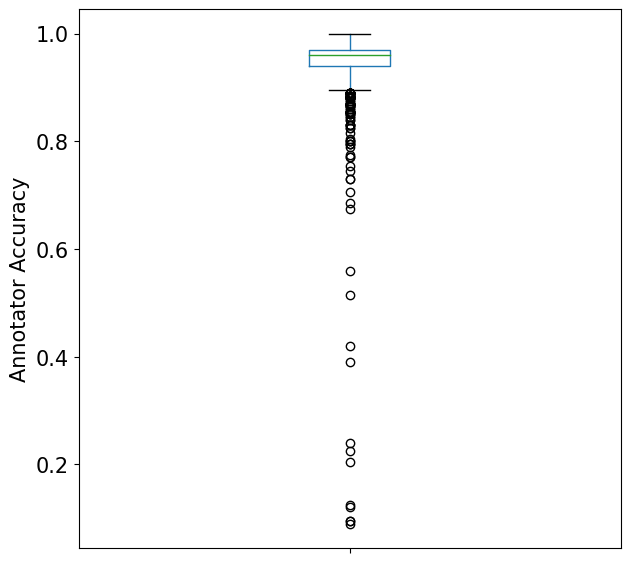

,score
count,2571.000000
mean,0.948744
std,0.057286
min,0.090000
25%,0.940000
50%,0.960000
75%,0.970000
max,1.000000


--- [3] Annotator Agreement with Consensus vs. Label Accuracy ---


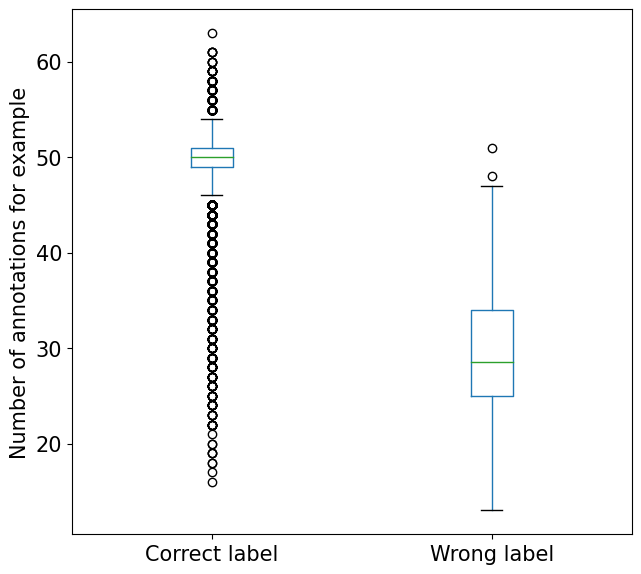

In [6]:
for dataset in datasets:
    print('-'*80)
    print(f'- DATASET {dataset}')
    
    multiannotator_labels = None # Same for all models of specific dataset
    true_labels = None # Same for all models of speciic dataset
    
    for model_name in model_names:
        print(f'- MODEL {model_name}')
        multiannotator_labels, true_labels, pred_probs = load_data(dataset, model_name)
        consensus_labels = get_consensus_label(multiannotator_labels, pred_probs=None)

        print('--- [1] Annotator vs Model accuracy ---')
        # Report how much the consensus labels and model predictions differ from true labels
        df = get_model_vs_consensus_accuracy(pred_probs, consensus_labels, true_labels)
        display(df)
    
    print('- MODEL AGNOSTIC\n')
    annotator_mask = get_annotator_mask(multiannotator_labels)
    labels_error_mask = get_labels_error_mask(multiannotator_labels, true_labels)
        
    print('--- [2] Distribution of individual annotator accuracy vs ground truth ---')
    plt_title = f"{dataset}_annotator_accuracy_vs_gt_plot.pdf"
    annotator_accuracy_df = plt_annotator_accuracy(labels_error_mask, annotator_mask, plot=True, fig_title=plt_title)
    display(annotator_accuracy_df.describe())

    print('--- [3] Annotator Agreement with Consensus vs. Label Accuracy ---')
    # Plots the distribution of annotator agreement for correct/incorrect labels
    plt_title = f"{dataset}_annotator_agreement_with_consensus_plot.pdf"
    plt_labels_multiannotator(multiannotator_labels, consensus_labels, true_labels, fig_title=plt_title)